In [1]:
#default_exp depth

In [2]:
#export
from transformers import GLPNFeatureExtractor, GLPNForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

feature_extractor = GLPNFeatureExtractor.from_pretrained("vinvino02/glpn-nyu")
model = GLPNForDepthEstimation.from_pretrained("vinvino02/glpn-nyu")

In [3]:
#export
def get_depth(image,mean_height=3.,cut_min_q=0.3):
    pixel_values = feature_extractor(image, return_tensors="pt").pixel_values


    with torch.no_grad():
        outputs = model(pixel_values)
        predicted_depth = outputs.predicted_depth

    # interpolate to original size
    prediction = torch.nn.functional.interpolate(
                        predicted_depth.unsqueeze(1),
                        size=pixel_values.shape[-2:],
                        mode="bicubic",
                        align_corners=False,
                 )
    prediction = -prediction.squeeze().cpu().numpy()
    prediction = prediction-prediction.min()
    min_ = np.quantile(prediction, cut_min_q)
    prediction = np.where(prediction<min_,min_,prediction)
    prediction = prediction-min_
    return prediction*mean_height/prediction.mean()

In [4]:
url = 'https://image.shutterstock.com/image-photo/traditional-greek-potato-meat-casserole-600w-1879491052.jpg'
image = Image.open(requests.get(url, stream=True).raw)


In [5]:
prediction = get_depth(image,mean_height=3.,cut_min_q=0.3)

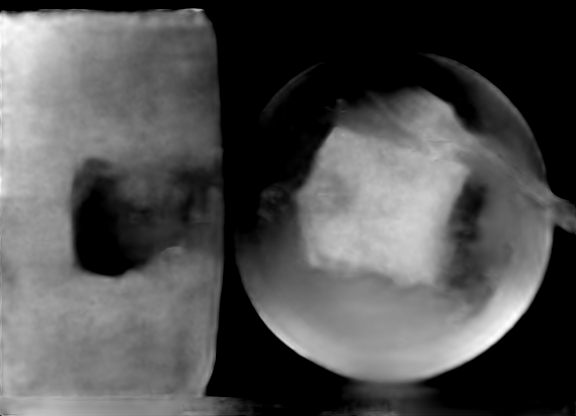

In [6]:
formatted = (prediction * 255 / np.max(prediction)).astype("uint8")
depth = Image.fromarray(formatted)
depth

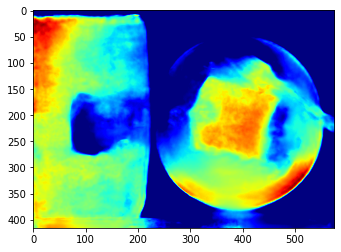

In [7]:
import matplotlib.pyplot as plt

plt.imshow(prediction, cmap="jet")

In [8]:
!conda activate f4;nbdev_build_lib

Converted 00_paths.ipynb.
Converted 00_psql.ipynb.
Converted 01_search.ipynb.
Converted bot.ipynb.
Converted depth.ipynb.
Converted inference.ipynb.
Converted search_dev.ipynb.
Converted search_segmented_stable.ipynb.
Converted stats.ipynb.
Converted usda.ipynb.
Converted usda_parsing.ipynb.
